In [ ]:
!pip install tensorflow
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [ ]:
data = pd.read_csv("feature.csv")

targetColumns = ['pts_per_game', 'ast_per_game', 'orb_per_game', 'drb_per_game']
features = data.drop(columns=targetColumns)
targets = data[targetColumns]

features.head(), targets.head()

(   Unnamed: 0   age  experience  age_lag1  experience_lag1  g_lag1  \
 0           0  39.0          17      38.0             16.0    48.0   
 1           1  36.0          16      35.0             15.0    42.0   
 2           2  37.0          16      36.0             15.0    50.0   
 3           3  38.0          17      37.0             16.0    82.0   
 4           4  39.0          18      38.0             17.0    82.0   
 
    mp_per_game_lag1  fg_per_game_lag1  fga_per_game_lag1  ft_per_game_lag1  \
 0              25.7               3.6                8.2               1.1   
 1              36.3               5.7               12.0               4.6   
 2              28.2               4.0                8.2               2.7   
 3              29.7               4.4                8.8               2.7   
 4              29.2               4.0                7.9               2.8   
 
    ...  percent_fga_from_x3p_range_lag3  fg_percent_from_x0_3_range_lag3  \
 0  ...            

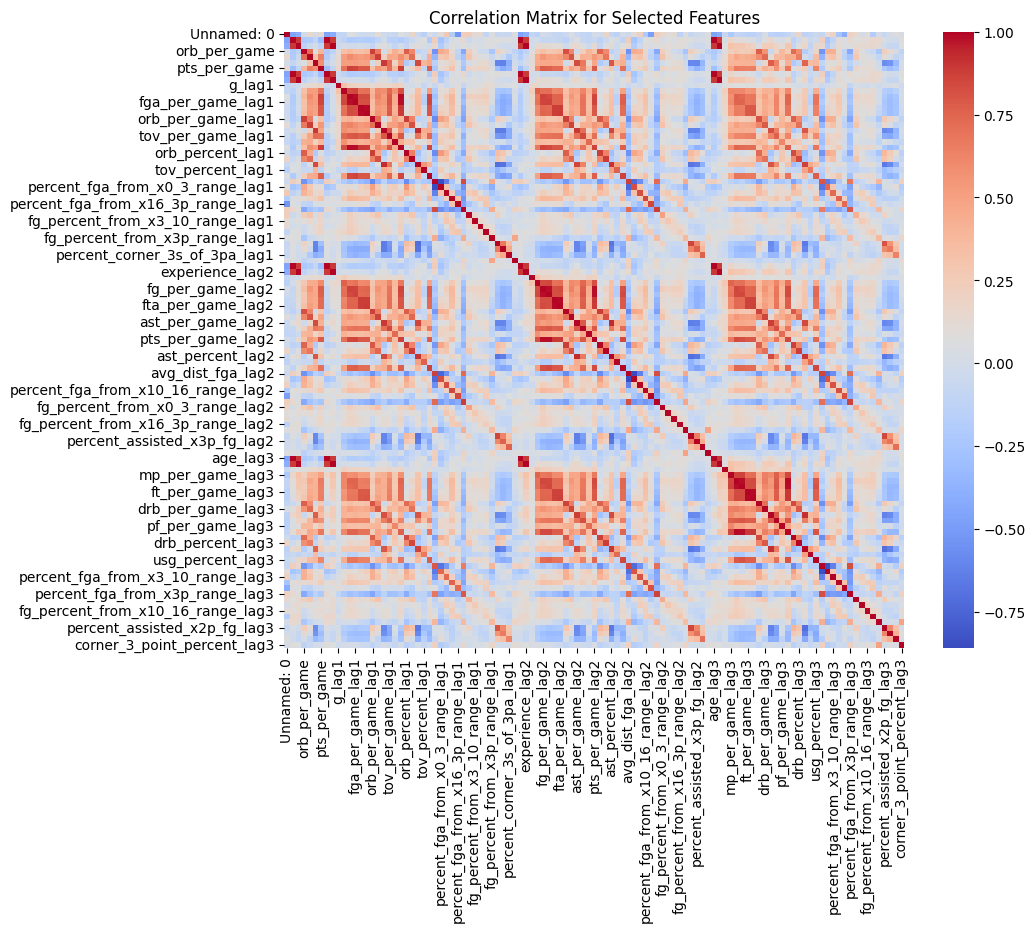

In [ ]:
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix for Selected Features")
plt.show()


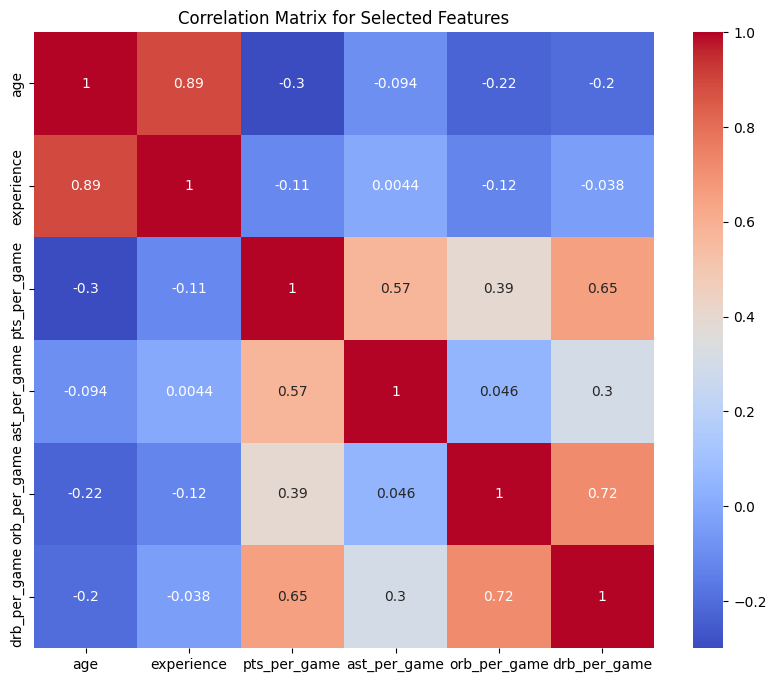

In [ ]:
# Updating the target variables list with the correct column name for assists per game
target_variables = ['pts_per_game', 'ast_per_game', 'orb_per_game', 'drb_per_game']

# Re-performing correlation analysis with the correct target variables
selected_features = ['age', 'experience'] + target_variables
correlation_matrix = data[selected_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Selected Features")
plt.show()


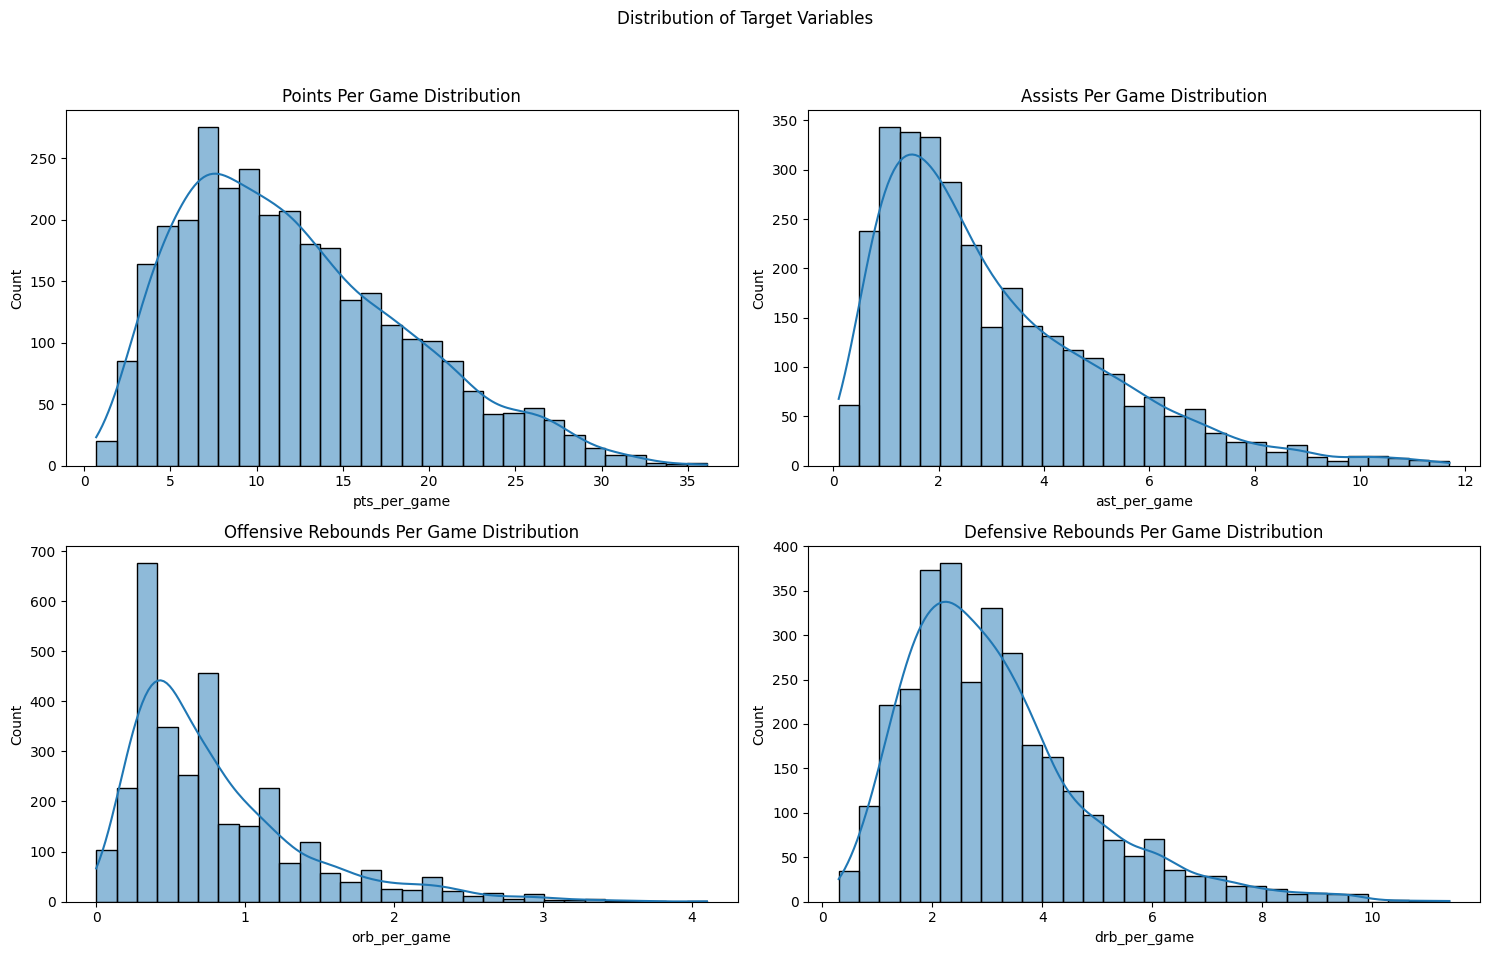

,pts_per_game,ast_per_game,orb_per_game,drb_per_game
count,3144.000000,3144.000000,3144.000000,3144.000000
mean,12.234288,3.019275,0.802067,3.140394
std,6.575205,2.123688,0.590522,1.673988
min,0.700000,0.100000,0.000000,0.300000
25%,7.100000,1.400000,0.400000,1.900000
50%,11.100000,2.400000,0.600000,2.800000
75%,16.500000,4.125000,1.000000,3.900000
max,36.100000,11.700000,4.100000,11.400000


In [ ]:
# Performing a more detailed exploratory data analysis (EDA)

# Plotting distributions of the target variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Distribution of Target Variables')

sns.histplot(data['pts_per_game'], ax=axes[0, 0], kde=True, bins=30)
axes[0, 0].set_title('Points Per Game Distribution')

sns.histplot(data['ast_per_game'], ax=axes[0, 1], kde=True, bins=30)
axes[0, 1].set_title('Assists Per Game Distribution')

sns.histplot(data['orb_per_game'], ax=axes[1, 0], kde=True, bins=30)
axes[1, 0].set_title('Offensive Rebounds Per Game Distribution')

sns.histplot(data['drb_per_game'], ax=axes[1, 1], kde=True, bins=30)
axes[1, 1].set_title('Defensive Rebounds Per Game Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Summary statistics for the target variables
summary_stats = data[target_variables].describe()
summary_stats


In [ ]:
# Reverting to original target variables for transformation
original_targets = ['pts_per_game', 'ast_per_game', 'orb_per_game', 'drb_per_game']

# Handling skewed target variables using Power Transformation (Yeo-Johnson)
pt = PowerTransformer()
data_transformed = data.copy()
data_transformed[original_targets] = pt.fit_transform(data[original_targets])

# Splitting the dataset into features (X) and target (Y) without the new efficiency metrics
X = data_transformed.drop(original_targets, axis=1)
Y = data_transformed[original_targets]

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalizing the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Returning the shapes of the split datasets to confirm successful preprocessing
X_train_scaled.shape, X_test_scaled.shape, Y_train.shape, Y_test.shape



((2515, 105), (629, 105), (2515, 4), (629, 4))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and Y_train are your training data and targets
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Extracting feature importances
feature_importances = rf.feature_importances_

# Associating feature names with their importance scores
feature_names = X_train.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))

# Sorting features by importance
sorted_features = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)

# Displaying top N features
top_features = sorted_features[:15]  # Replace N with the number of top features you want
top_features


[('fg_per_game_lag1', 0.24261567791286054),
 ('orb_per_game_lag1', 0.12924529232685986),
 ('ast_per_game_lag1', 0.10284720132932686),
 ('drb_per_game_lag1', 0.07733617806080928),
 ('pts_per_game_lag1', 0.061706780205817574),
 ('ast_percent_lag1', 0.03397085058971282),
 ('orb_percent_lag1', 0.023398522326379782),
 ('drb_per_game_lag2', 0.015293956152345335),
 ('orb_per_game_lag2', 0.012565688844655448),
 ('drb_percent_lag1', 0.01256056171432684),
 ('ast_percent_lag3', 0.010494243406854013),
 ('drb_percent_lag2', 0.008703657351966477),
 ('fga_per_game_lag1', 0.008703012166501363),
 ('orb_percent_lag2', 0.007842080956912882),
 ('ast_percent_lag2', 0.006776461692663648)]

In [ ]:
top_5_per_target = {}
original_targets  = ['pts_per_game', 'ast_per_game', 'orb_per_game', 'drb_per_game']

for target in original_targets:
  temp_y_train = Y_train[target]
  # Assuming X_train and Y_train are your training data and targets
  rfr = RandomForestRegressor(n_estimators=100, random_state=42)
  rf.fit(X_train, temp_y_train)

  # Extracting feature importances
  feature_importances = rf.feature_importances_

  # Associating feature names with their importance scores
  feature_names = X_train.columns
  feature_importances_dict = dict(zip(feature_names, feature_importances))

  # Sorting features by importance
  sorted_features = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)

  # Displaying top N features
  top_features = sorted_features[:5]  # Replace N with the number of top features you want
  top_5_per_target[target] = top_features

top_5_per_target

{'pts_per_game': [('pts_per_game_lag1', 0.6149009587676059),
  ('fg_per_game_lag1', 0.11231128413404598),
  ('fga_per_game_lag1', 0.016781235181251256),
  ('age', 0.007840900961733581),
  ('age_lag1', 0.0054468780967395795)],
 'ast_per_game': [('ast_per_game_lag1', 0.7766151767807116),
  ('ast_percent_lag3', 0.00908010832390331),
  ('ast_percent_lag2', 0.0063239938364360836),
  ('ast_per_game_lag2', 0.0061583095580300725),
  ('ast_percent_lag1', 0.003934763628096029)],
 'orb_per_game': [('orb_per_game_lag1', 0.7076259306169334),
  ('orb_per_game_lag2', 0.019599205235236505),
  ('orb_per_game_lag3', 0.01084006148944419),
  ('drb_percent_lag1', 0.006693765635954979),
  ('orb_percent_lag2', 0.006653022835797466)],
 'drb_per_game': [('drb_per_game_lag1', 0.7139022470302192),
  ('drb_per_game_lag2', 0.011320556741691839),
  ('Unnamed: 0', 0.006489761501500486),
  ('drb_percent_lag3', 0.006006873732965193),
  ('fg_percent_from_x0_3_range_lag1', 0.005539306327653822)]}

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

def train_evaluate_model(model, X_train, Y_train, X_test, Y_test, transformer, target_index, target_name):
    # Training the model
    model.fit(X_train, Y_train)

    # Predicting on the test set
    Y_pred = model.predict(X_test)

    # Inverse transform the predictions
    temp_predictions = np.zeros((len(Y_pred), transformer.n_features_in_))
    temp_predictions[:, target_index] = Y_pred.flatten()
    predictions_original_scale = transformer.inverse_transform(temp_predictions)[:, target_index]

    # Inverse transform the actual target values
    temp_actual = np.zeros((len(Y_test), transformer.n_features_in_))
    temp_actual[:, target_index] = Y_test
    actual_original_scale = transformer.inverse_transform(temp_actual)[:, target_index]

    # Evaluating the model
    rmse = np.sqrt(mean_squared_error(actual_original_scale, predictions_original_scale))
    mae = mean_absolute_error(actual_original_scale, predictions_original_scale)

    # Plotting Predicted vs Actual
    plt.figure(figsize=(10, 6))
    plt.scatter(actual_original_scale, predictions_original_scale, alpha=0.3)
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    plt.title(f'Predicted vs Actual for {target_name}')
    plt.plot([min(actual_original_scale), max(actual_original_scale)], [min(actual_original_scale), max(actual_original_scale)], color='red')  # Diagonal line for reference
    plt.show()

    return rmse, mae


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


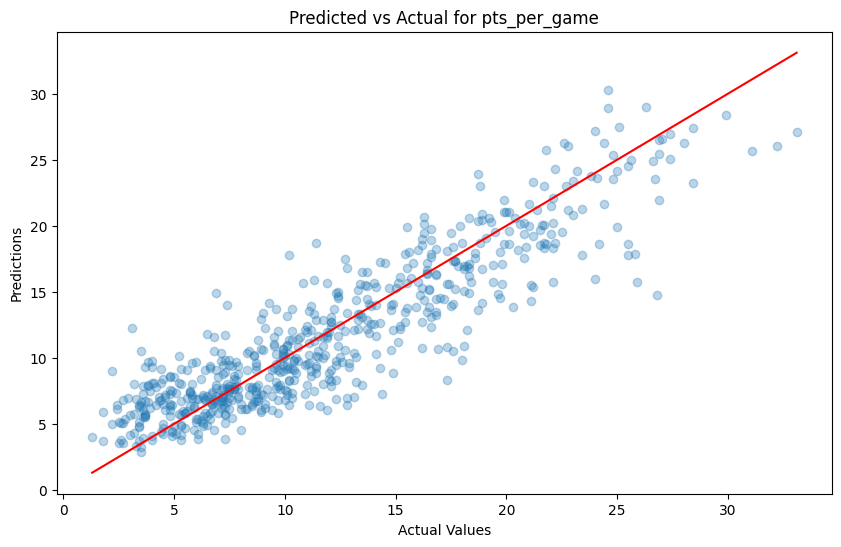

(2.8187488492654262, 2.1581531461412164)

In [ ]:
# Random Forest model for 'pts_per_game'
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Example usage
rf_rmse, rf_mae = train_evaluate_model(
    rf_model,
    X_train_scaled,
    Y_train['pts_per_game'],
    X_test_scaled,
    Y_test['pts_per_game'],
    pt,
    target_index=0,  # Index of 'pts_per_game' in the original targets
    target_name='pts_per_game'  # Name of the target for plotting
)
rf_rmse, rf_mae

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


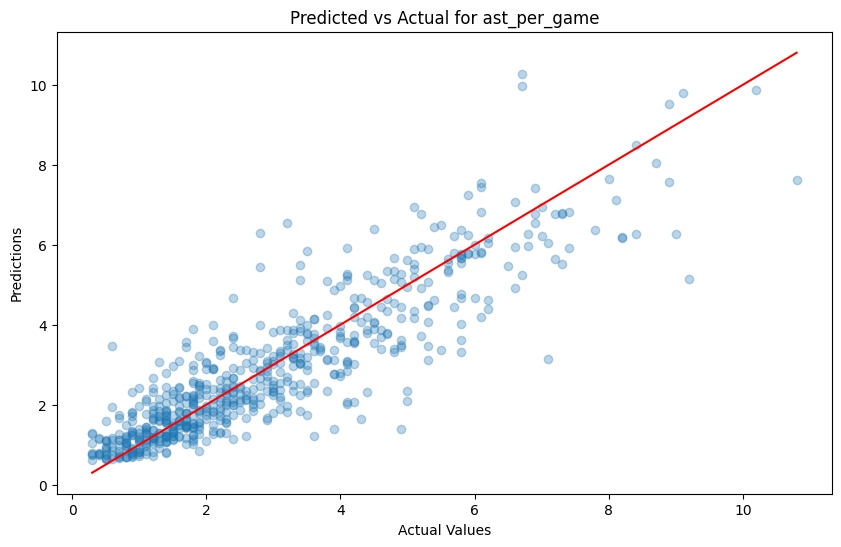

(0.9019536700158963, 0.6378935009219703)

In [ ]:
# Random Forest model for 'ast_per_game'
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Example usage
rf_rmse, rf_mae = train_evaluate_model(
    rf_model,
    X_train_scaled,
    Y_train['ast_per_game'],
    X_test_scaled,
    Y_test['ast_per_game'],
    pt,
    target_index=1,  # Index of 'ast_per_game' in the original targets
    target_name='ast_per_game'  # Name of the target for plotting
)
rf_rmse, rf_mae

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


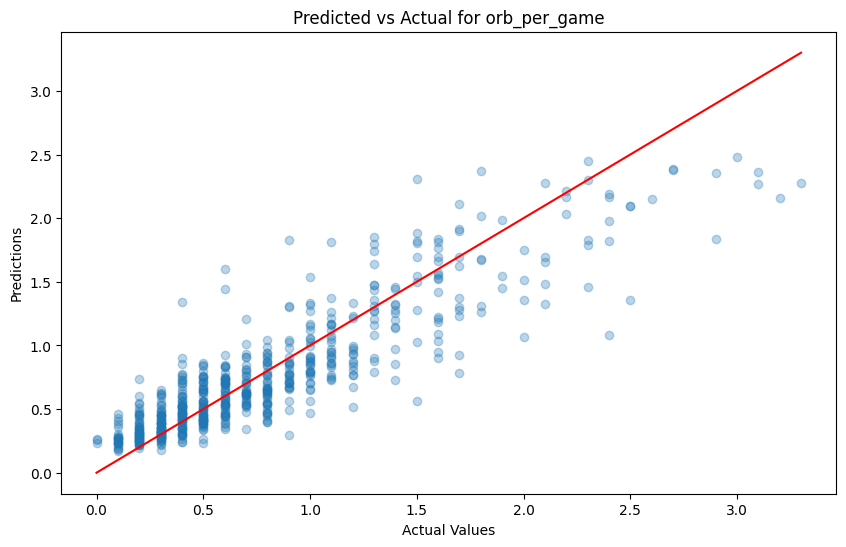

(0.27127274778879457, 0.1932827117374495)

In [ ]:
# Random Forest model for 'orb_per_game'
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Example usage
rf_rmse, rf_mae = train_evaluate_model(
    rf_model,
    X_train_scaled,
    Y_train['orb_per_game'],
    X_test_scaled,
    Y_test['orb_per_game'],
    pt,
    target_index=2,  # Index of 'orb_per_game' in the original targets
    target_name='orb_per_game'  # Name of the target for plotting
)
rf_rmse, rf_mae

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


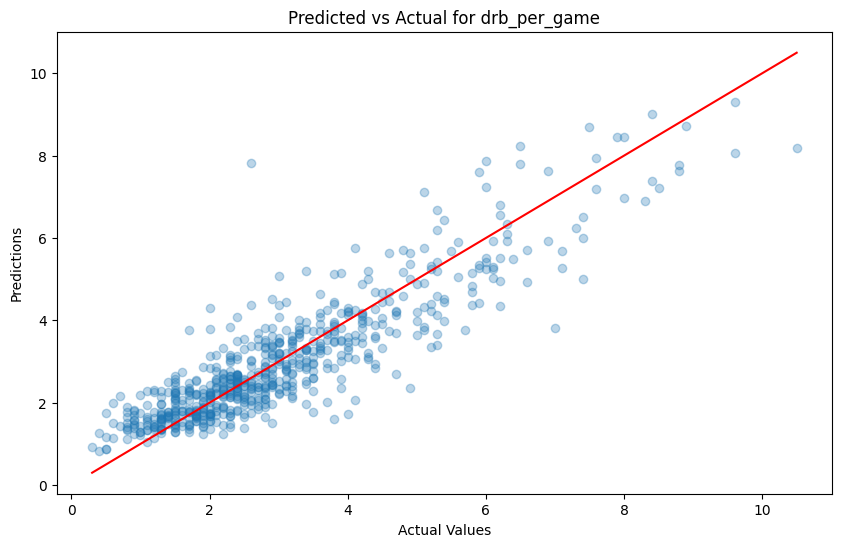

(0.7726107997441856, 0.5759280663746427)

In [ ]:
# Random Forest model for 'orb_per_game'
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Example usage
rf_rmse, rf_mae = train_evaluate_model(
    rf_model,
    X_train_scaled,
    Y_train['drb_per_game'],
    X_test_scaled,
    Y_test['drb_per_game'],
    pt,
    target_index=3,  # Index of 'orb_per_game' in the original targets
    target_name='drb_per_game'  # Name of the target for plotting
)
rf_rmse, rf_mae

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


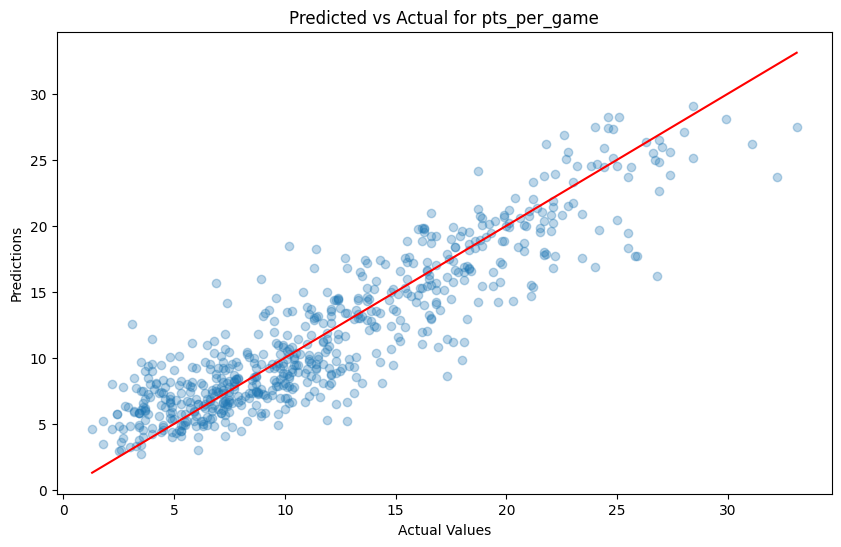

(2.7831260666990043, 2.1244490284794595)

In [ ]:
# Random Forest model for 'orb_per_game'
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Example usage
gb_rmse, gb_mae = train_evaluate_model(
    gb_model,
    X_train_scaled,
    Y_train['pts_per_game'],
    X_test_scaled,
    Y_test['pts_per_game'],
    pt,
    target_index=0,  # Index of 'orb_per_game' in the original targets
    target_name='pts_per_game'  # Name of the target for plotting
)
gb_rmse, gb_mae

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


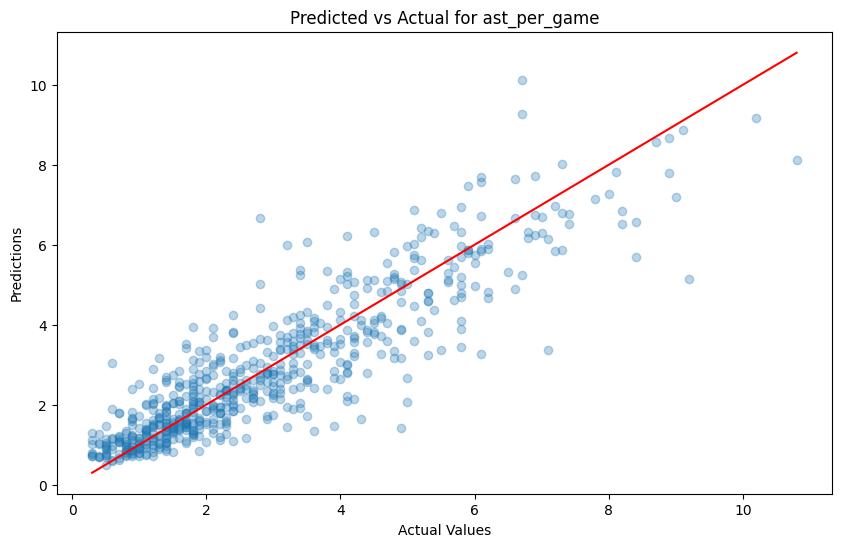

(0.8896396622845211, 0.639354321252787)

In [ ]:
# Random Forest model for 'orb_per_game'
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Example usage
gb_rmse, gb_mae = train_evaluate_model(
    gb_model,
    X_train_scaled,
    Y_train['ast_per_game'],
    X_test_scaled,
    Y_test['ast_per_game'],
    pt,
    target_index=1,  # Index of 'orb_per_game' in the original targets
    target_name='ast_per_game'  # Name of the target for plotting
)
gb_rmse, gb_mae

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


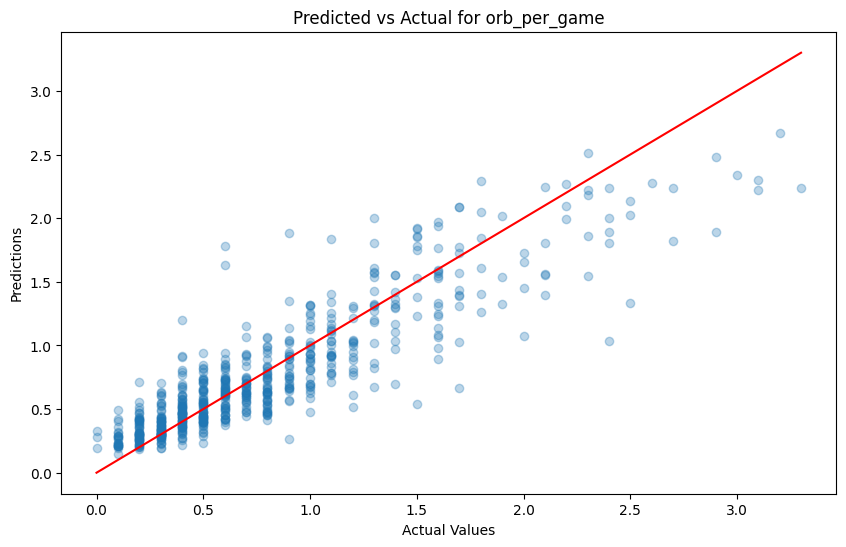

(0.269394493930734, 0.18844535140264496)

In [ ]:
# Random Forest model for 'orb_per_game'
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Example usage
gb_rmse, gb_mae = train_evaluate_model(
    gb_model,
    X_train_scaled,
    Y_train['orb_per_game'],
    X_test_scaled,
    Y_test['orb_per_game'],
    pt,
    target_index=2,  # Index of 'orb_per_game' in the original targets
    target_name='orb_per_game'  # Name of the target for plotting
)
gb_rmse, gb_mae

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


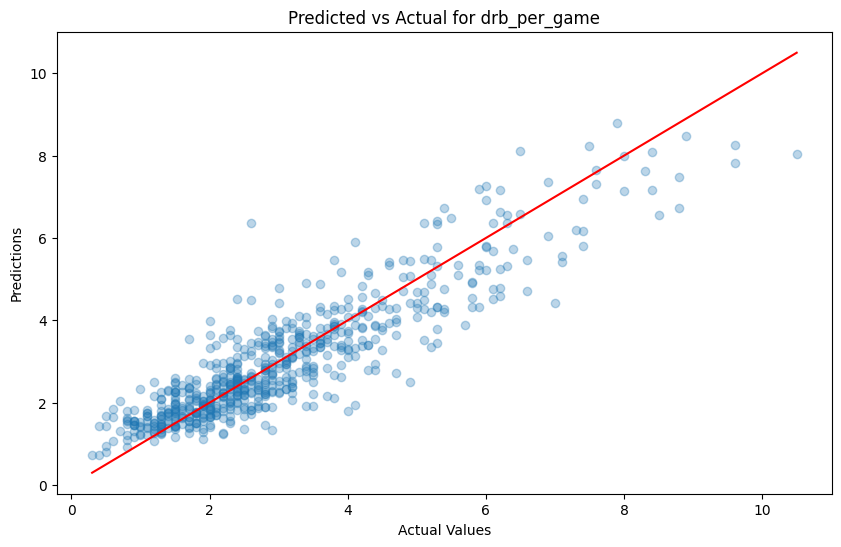

(0.7418835143191976, 0.5580257948904548)

In [ ]:
# Random Forest model for 'orb_per_game'
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Example usage
gb_rmse, gb_mae = train_evaluate_model(
    gb_model,
    X_train_scaled,
    Y_train['drb_per_game'],
    X_test_scaled,
    Y_test['drb_per_game'],
    pt,
    target_index=3,  # Index of 'orb_per_game' in the original targets
    target_name='drb_per_game'  # Name of the target for plotting
)
gb_rmse, gb_mae

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_multi_target_rnn_model(input_shape, num_targets):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(num_targets)  # Output layer for multiple targets
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model



In [ ]:
# Reshaping X_train and X_test for single timestep
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [ ]:
# Input shape based on the new X_train_rnn
input_shape = (X_train_rnn.shape[1], X_train_rnn.shape[2])

rnn_model = build_multi_target_rnn_model(input_shape, 4)
history = rnn_model.fit(
    X_train_rnn,
    Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_rnn, Y_test)
)


Epoch 1/10
79/79 [==============================] - 9s 27ms/step - loss: 0.6437 - val_loss: 0.3497
Epoch 2/10
79/79 [==============================] - 1s 11ms/step - loss: 0.3293 - val_loss: 0.2904
Epoch 3/10
79/79 [==============================] - 1s 11ms/step - loss: 0.2873 - val_loss: 0.2767
Epoch 4/10
79/79 [==============================] - 1s 10ms/step - loss: 0.2707 - val_loss: 0.2694
Epoch 5/10
79/79 [==============================] - 1s 9ms/step - loss: 0.2581 - val_loss: 0.2555
Epoch 6/10
79/79 [==============================] - 1s 9ms/step - loss: 0.2527 - val_loss: 0.2548
Epoch 7/10
79/79 [==============================] - 1s 9ms/step - loss: 0.2425 - val_loss: 0.2550
Epoch 8/10
79/79 [==============================] - 1s 8ms/step - loss: 0.2351 - val_loss: 0.2573
Epoch 9/10
79/79 [==============================] - 1s 13ms/step - loss: 0.2333 - val_loss: 0.2526
Epoch 10/10
79/79 [==============================] - 1s 10ms/step - loss: 0.2219 - val_loss: 0.2573


20/20 [==============================] - 0s 2ms/step - loss: 0.2573


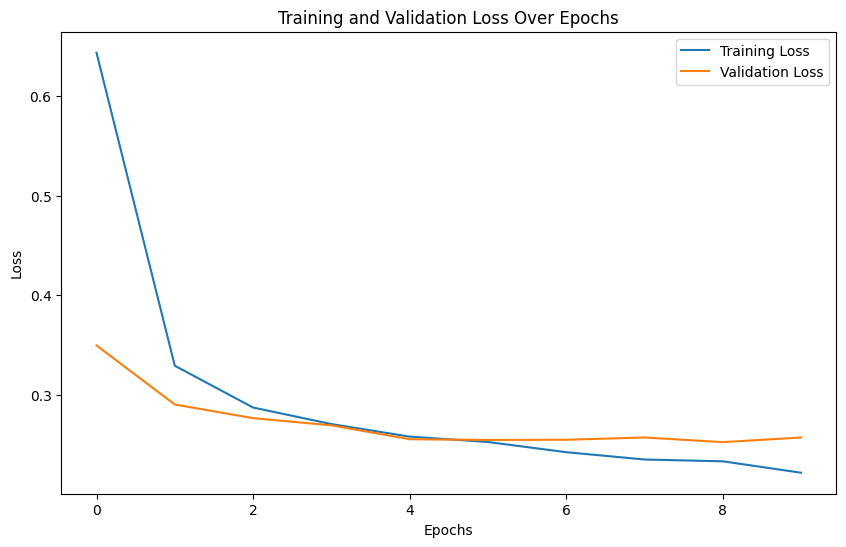

In [ ]:
# Evaluating the model on the test set
test_loss = rnn_model.evaluate(X_test_rnn, Y_test)

# Plotting Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


20/20 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


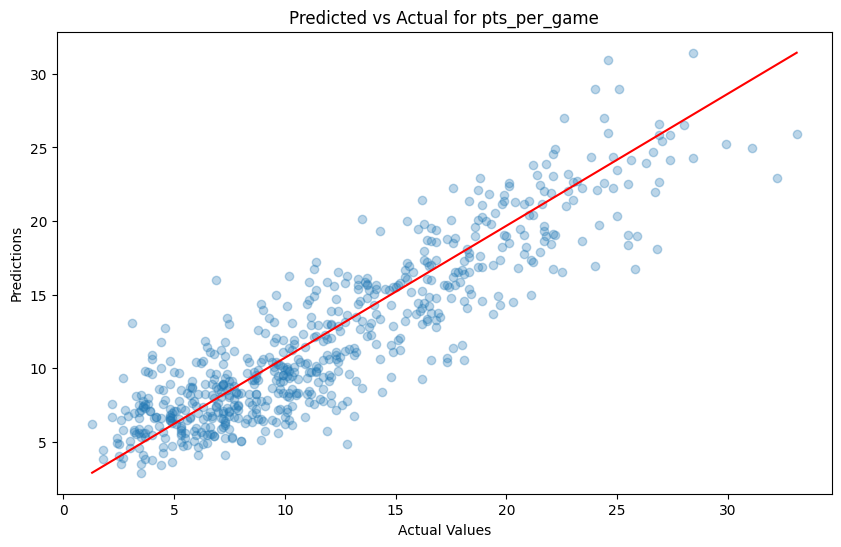

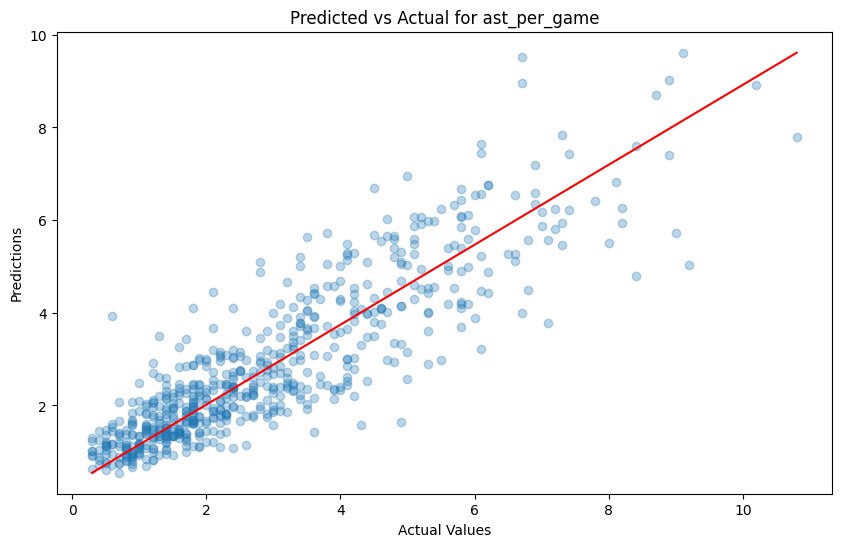

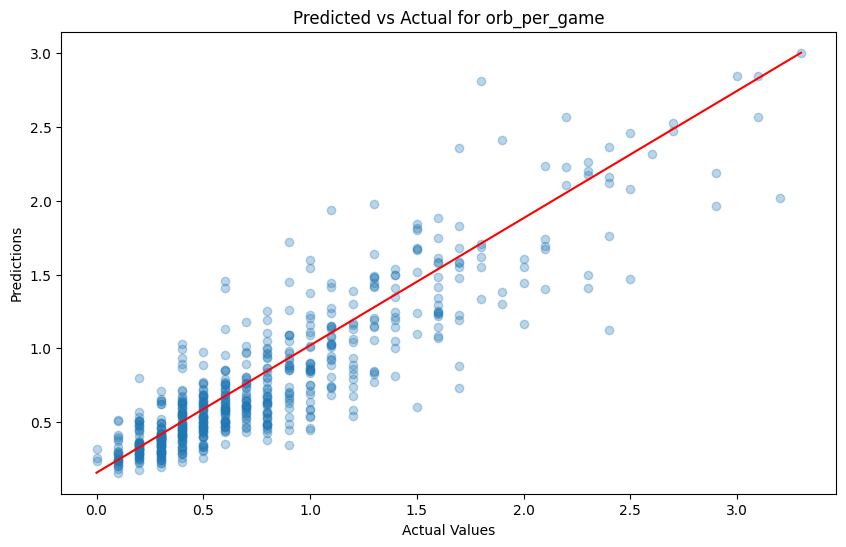

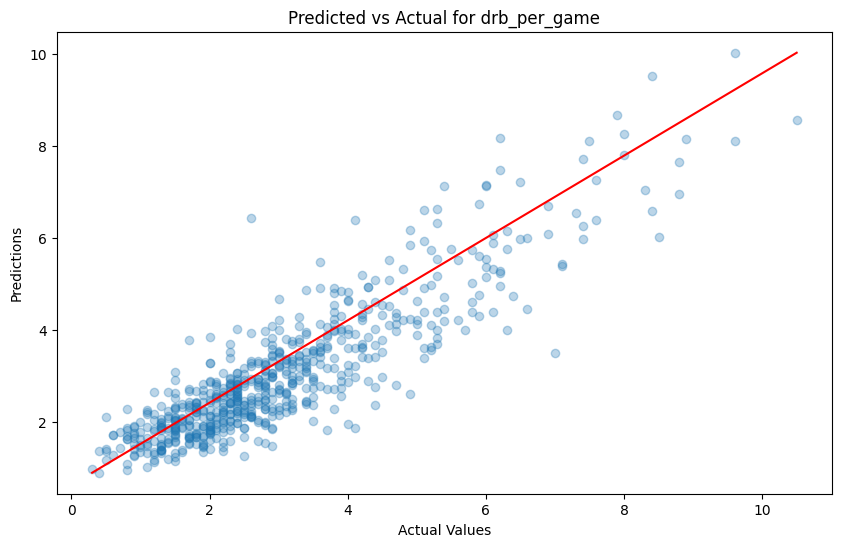

In [112]:
# Predictions
predictions = rnn_model.predict(X_test_rnn)
predictions_original_scale = pt.inverse_transform(predictions)
# Assuming Y_test is scaled
Y_test_original_scale = pt.inverse_transform(Y_test)

# Assuming Y_test and predictions have the same number of columns/targets
for i, target in enumerate(original_targets):
    plt.figure(figsize=(10, 6))
    plt.scatter(Y_test_original_scale[:, i], predictions_original_scale[:, i], alpha=0.3)
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    plt.title(f'Predicted vs Actual for {target}')
    plt.plot([min(Y_test_original_scale[:, i]), max(Y_test_original_scale[:, i])], [min(predictions_original_scale[:, i]), max(predictions_original_scale[:, i])], color='red')  # Diagonal line for reference

    plt.show()



# New Section